In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
sms = pd.read_csv('SPAM text message 20170820 - Data.csv', encoding='latin-1')

In [94]:
print(len(sms))

5572


In [95]:
sms.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
sms.shape

(5572, 2)

In [97]:
sms.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [98]:
sms.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [99]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [100]:
sms.sample()

,Category,Message
4091,spam,We tried to call you re your reply to our sms ...


In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [102]:
sms['Category'] = encoder.fit_transform(sms['Category'])

In [103]:
sms.isnull().sum()

Category    0
Message     0
dtype: int64

In [129]:
sms = sms.where((pd.notnull(sms)),'')

In [104]:
sms.duplicated().sum()

415

In [105]:
sms = sms.drop_duplicates(keep = 'first')

In [106]:
sms.duplicated().sum()

0

In [107]:
sms.shape

(5157, 2)

In [108]:
sms['length']=sms['Message'].apply(len)
sms.head()

,Category,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [109]:
sms['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

## PLOT

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns


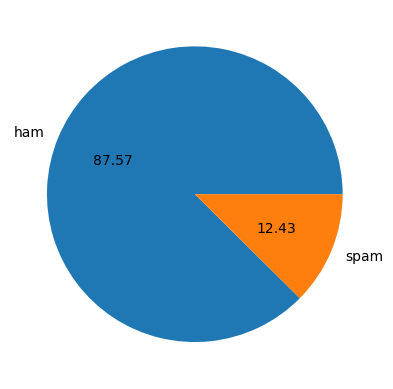

In [111]:
plt.pie(sms['Category'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f')
plt.show()

<Axes: ylabel='Frequency'>

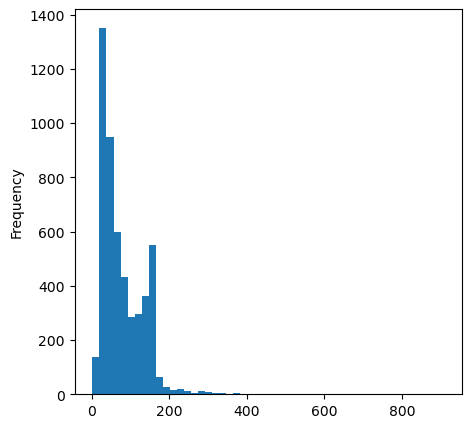

In [112]:


sms['length'].plot(bins=50, kind='hist',figsize=(5,5))

In [113]:
X = sms['Message']
Y = sms['Category']

In [119]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3) 

In [121]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [135]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase = True)


In [137]:

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [138]:
print(X_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can Ã¼ get it...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to Ã¼... Ã wan come then come lor... But i...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


In [139]:
print(X_train_features)

  (0, 6717)	0.48303813512243965
  (0, 6630)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2411)	0.4689535663823655
  (1, 1598)	0.5594126567616489
  (1, 5881)	0.5964494866231046
  (1, 6516)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6860)	0.24488128414489752
  (2, 5084)	0.22967525805125708
  (2, 7384)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2575)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4412)	0.24488128414489752
  (2, 4539)	0.24488128414489752
  (2, 4538)	0.24488128414489752
  (2, 4102)	0.2644704778405301
  (2, 6853)	0.13848562282513652
  (2, 3265)	0.18176623831152225
  (2, 3713)	0.21568440262445418
  (2, 4541)	0.2363176943466334
  (2, 4107)	0.2196593047164816
  :	:
  (4120, 6479)	0.4751891362657192
  (4120, 3193)	0.4285103741434733
  (4120, 3939)	0.39220487670240334
  (4120, 2109)	0.30807173962343376
  (4121, 5990)	0.46138848703500507
  (4121, 6306)	0.46138848703500507
 

In [140]:
model = LogisticRegression()

In [142]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [144]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [145]:
print('Acuracy on taining data: ', accuracy_on_training_data)

Acuracy on taining data:  0.9616969696969697


In [146]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_train, prediction_on_training_data)

In [147]:
print('Acuracy on taining data: ', accuracy_on_test_data)

Acuracy on taining data:  0.9616969696969697


## Building a predictive System

In [150]:
input_sms = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C']

input_data_features = feature_extraction.transform(input_sms)

prediction = model.predict(input_data_features)
print(prediction)

if (prediction[0]==1):
    print('Ham mail')
    
else:
    print('Spam mail')

[1]
Ham mail
